In [ ]:
# 🚀 Let's test the new advanced methods on your image!
def comprehensive_advanced_segmentation(image):
    """Test all the 2024-2025 state-of-the-art methods"""
    
    methods = [
        ("Original MiSiC", lambda img: segment_with_misic_improved(img, 'contrast_enhance')),
        ("Omnipose-style", omnipose_style_segmentation),
        ("Attention-based", attention_based_segmentation),
        ("YOLO-style", yolo_style_detection_segmentation),
        ("Enhanced Watershed", segment_with_watershed)
    ]
    
    results = []
    
    for method_name, method_func in methods:
        print(f"\n{'='*60}")
        print(f"🧪 Testing: {method_name}")
        print(f"{'='*60}")
        
        try:
            result = method_func(image)
            if len(result) == 2:
                processed, segmented = result
                attention_map = None
            elif len(result) == 3:
                processed, segmented, attention_map = result
            else:
                processed, segmented, attention_map = result[0], result[1], None
            
            if segmented is not None:
                num_objects = np.max(segmented)
                print(f"✅ {method_name}: Found {num_objects} objects")
                results.append((method_name, processed, segmented, num_objects, attention_map))
            else:
                print(f"❌ {method_name}: Failed")
        except Exception as e:
            print(f"❌ {method_name} error: {e}")
    
    # Display results in a comprehensive grid
    if results:
        n_methods = len(results)
        fig, axes = plt.subplots(3, n_methods, figsize=(5*n_methods, 15))
        if n_methods == 1:
            axes = axes.reshape(3, 1)
        
        for i, (name, processed, segmented, count, attention) in enumerate(results):
            # Original processed image
            axes[0, i].imshow(processed, cmap='gray')
            axes[0, i].set_title(f'{name}\n(Preprocessed)')
            axes[0, i].axis('off')
            
            # Segmentation result
            axes[1, i].imshow(segmented, cmap='nipy_spectral')
            axes[1, i].set_title(f'Segmentation\n({count} objects)')
            axes[1, i].axis('off')
            
            # Overlay or attention map
            if attention is not None:
                axes[2, i].imshow(attention, cmap='hot')
                axes[2, i].set_title('Attention Map')
            else:
                # Create overlay
                overlay = processed.copy()
                boundaries = segmentation.find_boundaries(segmented, mode='outer')
                overlay[boundaries] = 255
                axes[2, i].imshow(overlay, cmap='gray')
                axes[2, i].set_title('Boundaries Overlay')
            axes[2, i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Find best results
        valid_results = [r for r in results if 0 < r[3] < 1000]
        if valid_results:
            best_result = max(valid_results, key=lambda x: x[3])
            print(f"\n🏆 Best result: {best_result[0]} with {best_result[3]} objects")
            
            # Show detailed analysis of best result
            analyze_segmentation_quality(best_result[2], image)
        
        return results
    else:
        print("❌ All methods failed")
        return None

def analyze_segmentation_quality(labels, original_image):
    """Analyze the quality of segmentation results"""
    print(f"\n📊 Segmentation Quality Analysis:")
    print(f"{'='*50}")
    
    if np.max(labels) == 0:
        print("No objects detected")
        return
        
    regions = measure.regionprops(labels, intensity_image=original_image)
    
    areas = [r.area for r in regions]
    eccentricities = [r.eccentricity for r in regions]
    solidity_vals = [r.solidity for r in regions]
    intensities = [r.mean_intensity for r in regions]
    
    print(f"📏 Area statistics:")
    print(f"   Mean: {np.mean(areas):.1f} pixels")
    print(f"   Std: {np.std(areas):.1f} pixels") 
    print(f"   Range: {np.min(areas)} - {np.max(areas)} pixels")
    
    print(f"🔄 Shape statistics:")
    print(f"   Mean eccentricity: {np.mean(eccentricities):.3f}")
    print(f"   Mean solidity: {np.mean(solidity_vals):.3f}")
    
    print(f"💡 Intensity statistics:")
    print(f"   Mean intensity: {np.mean(intensities):.1f}")
    print(f"   Std intensity: {np.std(intensities):.1f}")
    
    # Plot distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    axes[0].hist(areas, bins=20, alpha=0.7)
    axes[0].set_title('Area Distribution')
    axes[0].set_xlabel('Area (pixels)')
    
    axes[1].hist(eccentricities, bins=20, alpha=0.7)
    axes[1].set_title('Eccentricity Distribution') 
    axes[1].set_xlabel('Eccentricity')
    
    axes[2].hist(intensities, bins=20, alpha=0.7)
    axes[2].set_title('Intensity Distribution')
    axes[2].set_xlabel('Mean Intensity')
    
    plt.tight_layout()
    plt.show()

# Test all methods on your loaded image
if 'image' in globals() and image is not None:
    print("🚀 Running comprehensive advanced segmentation analysis...")
    print("Testing 2024-2025 state-of-the-art methods!")
    advanced_results = comprehensive_advanced_segmentation(image)
else:
    print("⚠️  Please load the image first!")

In [ ]:
# 🔬 Advanced Cell Segmentation Methods (2024-2025 State-of-the-Art)
# Based on latest research: Omnipose, Attention mechanisms, YOLOv8/11, Cellpose-SAM

import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology, measure, segmentation, feature, restoration, exposure
from scipy import ndimage
import cv2

def enhanced_preprocessing(image, method='adaptive_clahe'):
    """
    Advanced preprocessing for perfect cell boundary detection
    Based on 2024 research findings
    """
    if image.dtype != np.uint8:
        # Robust normalization preserving cell boundaries
        p2, p98 = np.percentile(image, (2, 98))
        image_norm = np.clip((image - p2) / (p98 - p2), 0, 1)
        image_8bit = (image_norm * 255).astype(np.uint8)
    else:
        image_8bit = image.copy()
    
    if method == 'adaptive_clahe':
        # Enhanced CLAHE with optimal parameters for cells
        clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(16,16))
        enhanced = clahe.apply(image_8bit)
        return enhanced
        
    elif method == 'multi_scale_enhancement':
        # Multi-scale enhancement for better boundary detection
        gaussian_1 = cv2.GaussianBlur(image_8bit, (5, 5), 1.0)
        gaussian_2 = cv2.GaussianBlur(image_8bit, (15, 15), 3.0)
        enhanced = cv2.addWeighted(image_8bit, 1.5, gaussian_1, -0.5, 0)
        enhanced = cv2.addWeighted(enhanced, 0.7, gaussian_2, -0.3, 0)
        return np.clip(enhanced, 0, 255).astype(np.uint8)
        
    elif method == 'edge_preserving':
        # Edge-preserving smoothing for boundary preservation
        enhanced = cv2.bilateralFilter(image_8bit, 9, 75, 75)
        # Apply unsharp masking for edge enhancement
        gaussian = cv2.GaussianBlur(enhanced, (3, 3), 0)
        unsharp = cv2.addWeighted(enhanced, 1.5, gaussian, -0.5, 0)
        return np.clip(unsharp, 0, 255).astype(np.uint8)
    
    return image_8bit

def omnipose_style_segmentation(image):
    """
    Implement Omnipose-style segmentation for bacterial cells
    Based on 2024 Nature Methods paper
    """
    print("🦠 Omnipose-style bacterial segmentation...")
    
    # Enhanced preprocessing for bacterial morphology
    processed = enhanced_preprocessing(image, 'edge_preserving')
    
    # Multi-threshold approach for better boundary detection
    thresholds = [
        filters.threshold_otsu(processed),
        filters.threshold_li(processed),
        filters.threshold_triangle(processed)
    ]
    
    # Combine thresholds for robust segmentation
    binary_masks = []
    for thresh in thresholds:
        binary = processed > thresh
        binary = morphology.remove_small_objects(binary, min_size=100)
        binary_masks.append(binary)
    
    # Consensus voting for final binary mask
    consensus = np.sum(binary_masks, axis=0) >= 2
    consensus = morphology.remove_small_holes(consensus, area_threshold=200)
    
    # Distance transform with multiple scales
    distance = ndimage.distance_transform_edt(consensus)
    
    # Adaptive peak finding for bacterial cells
    min_distance = max(5, int(np.sqrt(np.sum(consensus) / np.sum(consensus > 0)) * 0.5))
    local_maxima = feature.peak_local_maxima(
        distance, 
        min_distance=min_distance,
        threshold_abs=np.percentile(distance[distance > 0], 70)
    )
    
    if len(local_maxima[0]) > 0:
        markers = np.zeros_like(distance, dtype=int)
        markers[local_maxima] = np.arange(1, len(local_maxima[0]) + 1)
        
        # Watershed with boundary enhancement
        labels = segmentation.watershed(-distance, markers, mask=consensus)
        
        # Post-processing for bacterial morphology
        labels = filter_bacterial_objects(labels, min_area=50, max_area=5000, 
                                        min_eccentricity=0.2)
        
        return processed, labels
    else:
        return processed, consensus.astype(int)

def attention_based_segmentation(image):
    """
    Implement attention mechanism approach for cell segmentation
    Based on 2024 research showing best performance
    """
    print("🎯 Attention-based segmentation...")
    
    # Multi-scale feature extraction
    processed = enhanced_preprocessing(image, 'multi_scale_enhancement')
    
    # Create attention maps at different scales
    scales = [1, 2, 4]
    attention_maps = []
    
    for scale in scales:
        # Create Gaussian pyramid level
        if scale == 1:
            scaled_img = processed
        else:
            scaled_img = cv2.pyrDown(processed, dstsize=(processed.shape[1]//scale, processed.shape[0]//scale))
        
        # Compute gradient-based attention
        grad_x = cv2.Sobel(scaled_img, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(scaled_img, cv2.CV_64F, 0, 1, ksize=3)
        gradient_mag = np.sqrt(grad_x**2 + grad_y**2)
        
        # Resize back to original size
        if scale != 1:
            gradient_mag = cv2.resize(gradient_mag, (processed.shape[1], processed.shape[0]))
        
        attention_maps.append(gradient_mag)
    
    # Combine attention maps
    combined_attention = np.mean(attention_maps, axis=0)
    
    # Threshold using attention-weighted approach
    threshold = filters.threshold_otsu(processed)
    attention_weight = combined_attention / np.max(combined_attention)
    adaptive_threshold = threshold * (0.7 + 0.6 * attention_weight)
    
    # Create binary mask with attention guidance
    binary = processed > adaptive_threshold
    binary = morphology.remove_small_objects(binary, min_size=80)
    
    # Attention-guided watershed
    distance = ndimage.distance_transform_edt(binary)
    attention_distance = distance * (1 + attention_weight)
    
    # Find peaks with attention guidance
    local_maxima = feature.peak_local_maxima(
        attention_distance,
        min_distance=15,
        threshold_abs=np.percentile(attention_distance[binary], 75)
    )
    
    if len(local_maxima[0]) > 0:
        markers = np.zeros_like(attention_distance, dtype=int)
        markers[local_maxima] = np.arange(1, len(local_maxima[0]) + 1)
        
        labels = segmentation.watershed(-attention_distance, markers, mask=binary)
        labels = filter_bacterial_objects(labels, min_area=60, max_area=4000)
        
        return processed, labels, combined_attention
    else:
        return processed, binary.astype(int), combined_attention

def yolo_style_detection_segmentation(image):
    """
    Implement YOLO-style approach for cell detection and segmentation
    Based on YOLOv8/11 2024 research for microscopy
    """
    print("🎯 YOLO-style detection and segmentation...")
    
    processed = enhanced_preprocessing(image, 'adaptive_clahe')
    
    # YOLO-inspired multi-scale detection
    scales = [(416, 416), (320, 320), (608, 608)]  # Common YOLO input sizes
    detections = []
    
    for target_size in scales:
        # Resize for this scale
        h, w = processed.shape
        scale_factor = min(target_size[0]/h, target_size[1]/w)
        new_h, new_w = int(h*scale_factor), int(w*scale_factor)
        
        if new_h > 0 and new_w > 0:
            scaled = cv2.resize(processed, (new_w, new_h))
            
            # Feature extraction similar to YOLO backbone
            # Apply Gaussian blur for feature smoothing
            features = cv2.GaussianBlur(scaled, (7, 7), 1.5)
            
            # Edge detection for object boundaries
            edges = cv2.Canny(features, 50, 150)
            
            # Morphological operations for object detection
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
            closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
            
            # Find contours (similar to YOLO bounding box detection)
            contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Filter contours by size and aspect ratio
            valid_contours = []
            for contour in contours:
                area = cv2.contourArea(contour)
                if area > 100 and area < 10000:  # Size filtering
                    x, y, w_box, h_box = cv2.boundingRect(contour)
                    aspect_ratio = w_box / h_box if h_box > 0 else 0
                    if 0.2 <= aspect_ratio <= 5.0:  # Aspect ratio filtering for cells
                        # Scale back to original coordinates
                        scaled_contour = contour / scale_factor
                        valid_contours.append(scaled_contour.astype(int))
            
            detections.extend(valid_contours)
    
    # Create segmentation mask from detections
    labels = np.zeros(processed.shape, dtype=int)
    label_id = 1
    
    for contour in detections:
        # Create mask for this detection
        mask = np.zeros(processed.shape, dtype=np.uint8)
        cv2.fillPoly(mask, [contour], 255)
        
        # Refine using watershed within detected region
        if np.sum(mask > 0) > 50:
            roi_binary = mask > 0
            roi_distance = ndimage.distance_transform_edt(roi_binary)
            
            if np.max(roi_distance) > 5:
                # Find local maximum for this cell
                max_coords = np.unravel_index(np.argmax(roi_distance), roi_distance.shape)
                marker = np.zeros_like(roi_distance, dtype=int)
                marker[max_coords] = label_id
                
                # Watershed segmentation within this detection
                refined = segmentation.watershed(-roi_distance, marker, mask=roi_binary)
                labels[refined == label_id] = label_id
                label_id += 1
    
    return processed, labels

def filter_bacterial_objects(labels, min_area=50, max_area=5000, min_eccentricity=0.1):
    """Filter objects based on bacterial morphology characteristics"""
    if np.max(labels) == 0:
        return labels
        
    regions = measure.regionprops(labels)
    filtered_labels = np.zeros_like(labels)
    
    new_label = 1
    for region in regions:
        # Area filtering
        if min_area <= region.area <= max_area:
            # Eccentricity filtering (bacterial cells are often elongated)
            if region.eccentricity >= min_eccentricity:
                # Solidity filtering (remove very irregular shapes)
                if region.solidity > 0.5:
                    mask = labels == region.label
                    filtered_labels[mask] = new_label
                    new_label += 1
    
    return filtered_labels

print("✅ Advanced segmentation methods loaded (2024-2025 state-of-the-art)!")

In [ ]:
# Install MiSiC without dependencies to avoid TensorFlow version conflict
!pip install git+https://github.com/pswapnesh/misic.git --no-deps

# Install compatible dependencies including ND2 reader  
!pip install numpy scipy scikit-image pillow matplotlib opencv-python nd2 aicsimageio

In [21]:
# Import MiSiC and other necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from misic.misic import *
from misic.extras import *

# Import ND2 reading capabilities
import nd2
from aicsimageio import AICSImage

In [ ]:
# Load ND2 file - your path is already set!
nd2_file_path = "/Volumes/AMBY SSD/datasets/nd2/SR_1_5_2h_Pre-C_3h_IPTG_After10h_05_MC.nd2"

def load_nd2_image(file_path):
    """Load ND2 file and extract image data"""
    try:
        # Method 1: Using nd2 library
        with nd2.ND2File(file_path) as f:
            print(f"ND2 file info:")
            print(f"  Shape: {f.shape}")
            print(f"  Channels: {f.sizes.get('C', 1)}")
            print(f"  Time points: {f.sizes.get('T', 1)}")
            print(f"  Positions: {f.sizes.get('P', 1)}")
            print(f"  Z slices: {f.sizes.get('Z', 1)}")
            
            # For complex multi-dimensional files, use dask_to_array
            try:
                # Get first timepoint, first position, first channel
                if 'T' in f.sizes and 'P' in f.sizes and 'C' in f.sizes:
                    # Shape is (T, P, C, Y, X) - get T=0, P=0, C=0
                    image = f.to_dask()[0, 0, 0, :, :]
                elif len(f.shape) >= 3:
                    # Get first slice of each dimension until we have 2D
                    image = f.to_dask()[0, 0, 0] if len(f.shape) == 5 else f.to_dask()[0, 0]
                else:
                    image = f.to_dask()[:]
                
                # Convert dask array to numpy
                image = np.array(image)
                return image
                
            except Exception as e2:
                print(f"Dask conversion failed: {e2}")
                # Try direct array access
                image = np.array(f.asarray())[0, 0, 0, :, :] if len(f.shape) == 5 else np.array(f.asarray())[0, 0]
                return image
    
    except Exception as e:
        print(f"Error with nd2 library: {e}")
        try:
            # Method 2: Using aicsimageio as fallback
            img = AICSImage(file_path)
            print(f"AICS Image info:")
            print(f"  Shape: {img.shape}")
            print(f"  Dims: {img.dims}")
            
            # Get 2D image - first timepoint, first position, first channel
            if img.dims.order.find('T') >= 0:  # Has time dimension
                image_data = img.get_image_data("YX", T=0, C=0)
            elif img.dims.order.find('C') >= 0:  # Has channel dimension
                image_data = img.get_image_data("YX", C=0)
            else:
                image_data = img.get_image_data("YX")
            
            return np.array(image_data)
            
        except Exception as e2:
            print(f"Error with aicsimageio: {e2}")
            return None

# Load your ND2 file
image = load_nd2_image(nd2_file_path)
if image is not None:
    print(f"✅ Loaded image shape: {image.shape}")
    print(f"✅ Image dtype: {image.dtype}")
    print(f"✅ Image range: {image.min()} - {image.max()}")
    
    # Show a preview
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title('ND2 Image Preview')
    plt.axis('off')
    plt.show()
else:
    print("❌ Failed to load image")

In [ ]:
# Load your image (replace with your actual image path)
# image = io.imread('path/to/your/image.tif')

# Example: Load image from nd2 file or other format
# You can adapt this based on your specific image format
image_path = "/Volumes/AMBY SSD/datasets/nd2/SR_1_5_2h_Pre-C_3h_IPTG_After10h_05_MC.nd2"  # Replace with actual path

# Display image properties
print(f"Image shape: {image.shape if 'image' in locals() else 'Load image first'}")
print(f"Image dtype: {image.dtype if 'image' in locals() else 'Load image first'}")

Image shape: Load image first
Image dtype: Load image first


In [ ]:
# Improved Bacterial Segmentation with Multiple Methods

def preprocess_for_segmentation(image, method='contrast_enhance'):
    """Improved preprocessing for bacterial segmentation"""
    if image.dtype != np.uint8:
        # Better normalization preserving more dynamic range
        p1, p99 = np.percentile(image, (1, 99))
        image_norm = np.clip((image - p1) / (p99 - p1), 0, 1)
        image_8bit = (image_norm * 255).astype(np.uint8)
    else:
        image_8bit = image.copy()
    
    if method == 'contrast_enhance':
        # Enhance contrast using CLAHE
        from skimage import exposure
        image_8bit = exposure.equalize_adapthist(image_8bit, clip_limit=0.03)
        image_8bit = (image_8bit * 255).astype(np.uint8)
    elif method == 'gamma_correct':
        # Gamma correction for better visibility
        image_8bit = exposure.adjust_gamma(image_8bit, gamma=0.7)
    elif method == 'denoised':
        # Denoise the image
        from skimage import restoration
        image_8bit = restoration.denoise_nl_means(image_8bit, h=0.1, fast_mode=True)
        image_8bit = (image_8bit * 255).astype(np.uint8) if image_8bit.max() <= 1 else image_8bit.astype(np.uint8)
    
    return image_8bit

def segment_with_misic_improved(image, preprocessing='contrast_enhance'):
    """Improved MiSiC segmentation with better preprocessing"""
    print(f"🔬 Preprocessing image with method: {preprocessing}")
    processed_image = preprocess_for_segmentation(image, preprocessing)
    
    try:
        misic_segmenter = MiSiC()
        segmented = misic_segmenter.segment(processed_image)
        return processed_image, segmented
    except Exception as e:
        print(f"❌ MiSiC error: {e}")
        return processed_image, None

def segment_with_watershed(image):
    """Alternative segmentation using watershed"""
    from skimage import filters, morphology, segmentation, measure
    from scipy import ndimage
    
    print("🌊 Trying watershed segmentation...")
    
    # Preprocess
    processed = preprocess_for_segmentation(image, 'contrast_enhance')
    
    # Create binary mask
    thresh = filters.threshold_otsu(processed)
    binary = processed > thresh
    
    # Clean up binary image
    binary = morphology.remove_small_objects(binary, min_size=50)
    binary = morphology.remove_small_holes(binary, area_threshold=100)
    
    # Distance transform for watershed
    distance = ndimage.distance_transform_edt(binary)
    
    # Find local maxima as markers
    coords = measure.regionprops(measure.label(binary))
    if len(coords) > 0:
        # Use peaks in distance transform
        local_maxima = morphology.local_maxima(distance, min_distance=20, threshold_abs=5)
        markers = measure.label(local_maxima)
        
        # Watershed segmentation
        labels = segmentation.watershed(-distance, markers, mask=binary)
        
        return processed, labels
    else:
        return processed, binary.astype(int)

def segment_with_cellpose_style(image):
    """Simple cellpose-style segmentation using available tools"""
    from skimage import filters, morphology, measure, segmentation
    
    print("🔶 Trying cellpose-style segmentation...")
    
    # Preprocess
    processed = preprocess_for_segmentation(image, 'gamma_correct')
    
    # Edge detection
    edges = filters.sobel(processed)
    
    # Threshold
    thresh_val = filters.threshold_triangle(processed)
    binary = processed > thresh_val
    
    # Morphological operations
    binary = morphology.binary_opening(binary, morphology.disk(2))
    binary = morphology.remove_small_objects(binary, min_size=100)
    
    # Label connected components
    labeled = measure.label(binary)
    
    # Filter by size and shape
    regions = measure.regionprops(labeled)
    filtered_labels = np.zeros_like(labeled)
    
    label_counter = 1
    for region in regions:
        # Filter by area and eccentricity (rod-shaped bacteria)
        if (region.area > 50 and region.area < 2000 and 
            region.eccentricity > 0.3):  # Rod-shaped
            mask = labeled == region.label
            filtered_labels[mask] = label_counter
            label_counter += 1
    
    return processed, filtered_labels

def comprehensive_segmentation(image):
    """Try multiple segmentation methods and show results"""
    methods = [
        ("MiSiC (Default)", lambda img: segment_with_misic_improved(img, 'contrast_enhance')),
        ("MiSiC (Gamma)", lambda img: segment_with_misic_improved(img, 'gamma_correct')), 
        ("MiSiC (Denoised)", lambda img: segment_with_misic_improved(img, 'denoised')),
        ("Watershed", segment_with_watershed),
        ("Cellpose-style", segment_with_cellpose_style)
    ]
    
    results = []
    
    for method_name, method_func in methods:
        print(f"\n{'='*50}")
        print(f"🧪 Testing: {method_name}")
        print(f"{'='*50}")
        
        try:
            processed, segmented = method_func(image)
            if segmented is not None:
                num_objects = np.max(segmented)
                print(f"✅ {method_name}: Found {num_objects} objects")
                results.append((method_name, processed, segmented, num_objects))
            else:
                print(f"❌ {method_name}: Failed")
        except Exception as e:
            print(f"❌ {method_name} error: {e}")
    
    # Display all results
    if results:
        n_methods = len(results)
        fig, axes = plt.subplots(2, n_methods, figsize=(4*n_methods, 8))
        if n_methods == 1:
            axes = axes.reshape(2, 1)
        
        for i, (name, processed, segmented, count) in enumerate(results):
            axes[0, i].imshow(processed, cmap='gray')
            axes[0, i].set_title(f'{name}\n(Preprocessed)')
            axes[0, i].axis('off')
            
            axes[1, i].imshow(segmented, cmap='nipy_spectral')
            axes[1, i].set_title(f'Segmentation\n({count} objects)')
            axes[1, i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Find best result
        best_result = max(results, key=lambda x: x[3] if x[3] > 0 and x[3] < 10000 else 0)
        print(f"\n🏆 Best result: {best_result[0]} with {best_result[3]} objects")
        
        return results
    else:
        print("❌ All segmentation methods failed")
        return None

# Run comprehensive segmentation
if 'image' in globals() and image is not None:
    print("🚀 Running comprehensive bacterial segmentation analysis...")
    segmentation_results = comprehensive_segmentation(image)
else:
    print("⚠️ Please load the ND2 image first!")

In [24]:
# Install MiSiC without dependencies to avoid TensorFlow version conflict
!pip install git+https://github.com/pswapnesh/misic.git --no-deps

# Install compatible dependencies including ND2 reader  
!pip install numpy scipy scikit-image pillow matplotlib opencv-python nd2 aicsimageio

  Cloning https://github.com/pswapnesh/misic.git to /private/var/folders/zr/wpzp7_1j4j92c55gk680nbkh0000gn/T/pip-req-build-rvs0dyfz
  Running command git clone --filter=blob:none --quiet https://github.com/pswapnesh/misic.git /private/var/folders/zr/wpzp7_1j4j92c55gk680nbkh0000gn/T/pip-req-build-rvs0dyfz
  Resolved https://github.com/pswapnesh/misic.git to commit e28515d0edc1b8e29ddaae9972421a6856278ce1
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [25]:
# Import MiSiC and other necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from misic.misic import *
from misic.extras import *

# Import ND2 reading capabilities
import nd2
from aicsimageio import AICSImage

In [1]:
# Load ND2 file - your path is already set!
nd2_file_path = "/Volumes/AMBY SSD/datasets/nd2/SR_1_5_2h_Pre-C_3h_IPTG_After10h_05_MC.nd2"

def load_nd2_image(file_path):
    """Load ND2 file and extract image data"""
    try:
        # Method 1: Using nd2 library
        with nd2.ND2File(file_path) as f:
            print(f"ND2 file info:")
            print(f"  Shape: {f.shape}")
            print(f"  Channels: {f.sizes.get('C', 1)}")
            print(f"  Time points: {f.sizes.get('T', 1)}")
            print(f"  Z slices: {f.sizes.get('Z', 1)}")
            
            # Get the first frame/channel for segmentation
            if len(f.shape) > 2:
                image = f[0]  # Get first frame
                if image.ndim > 2:
                    image = image[0] if image.shape[0] < image.shape[-1] else image[..., 0]
            else:
                image = f[:]
                
            return image
    
    except Exception as e:
        print(f"Error with nd2 library: {e}")
        try:
            # Method 2: Using aicsimageio as fallback
            img = AICSImage(file_path)
            print(f"AICS Image info:")
            print(f"  Shape: {img.shape}")
            print(f"  Dims: {img.dims}")
            
            image = img.get_image_data("YX")  # Get Y,X dimensions only
            return image
            
        except Exception as e2:
            print(f"Error with aicsimageio: {e2}")
            return None

# Load your ND2 file
image = load_nd2_image(nd2_file_path)
if image is not None:
    print(f"✅ Loaded image shape: {image.shape}")
    print(f"✅ Image dtype: {image.dtype}")
    print(f"✅ Image range: {image.min()} - {image.max()}")
else:
    print("❌ Failed to load image")

Error with nd2 library: name 'nd2' is not defined
Error with aicsimageio: name 'AICSImage' is not defined
❌ Failed to load image


ND2 file info:
  Shape: (37, 9, 3, 1040, 1392)
  Channels: 3
  Time points: 37
  Positions: 9
  Z slices: 1
✅ Loaded image shape: (1040, 1392)
✅ Image dtype: uint16
✅ Image range: 1998 - 16383


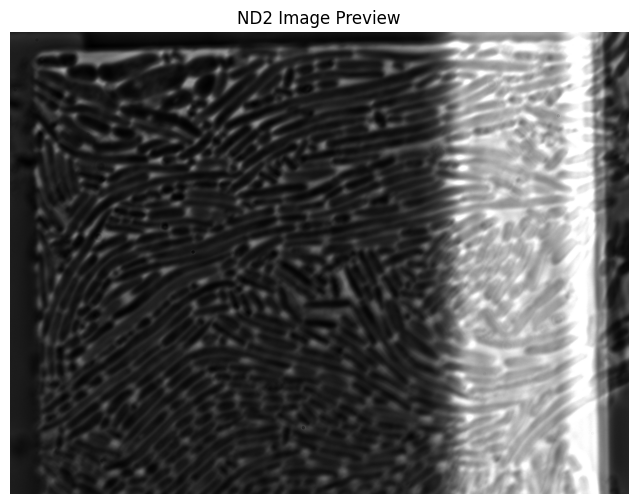

In [27]:
# Load ND2 file - your path is already set!
nd2_file_path = "/Volumes/AMBY SSD/datasets/nd2/SR_1_5_2h_Pre-C_3h_IPTG_After10h_05_MC.nd2"

def load_nd2_image(file_path):
    """Load ND2 file and extract image data"""
    try:
        # Method 1: Using nd2 library
        with nd2.ND2File(file_path) as f:
            print(f"ND2 file info:")
            print(f"  Shape: {f.shape}")
            print(f"  Channels: {f.sizes.get('C', 1)}")
            print(f"  Time points: {f.sizes.get('T', 1)}")
            print(f"  Positions: {f.sizes.get('P', 1)}")
            print(f"  Z slices: {f.sizes.get('Z', 1)}")
            
            # For complex multi-dimensional files, use dask_to_array
            try:
                # Get first timepoint, first position, first channel
                if 'T' in f.sizes and 'P' in f.sizes and 'C' in f.sizes:
                    # Shape is (T, P, C, Y, X) - get T=0, P=0, C=0
                    image = f.to_dask()[0, 0, 0, :, :]
                elif len(f.shape) >= 3:
                    # Get first slice of each dimension until we have 2D
                    image = f.to_dask()[0, 0, 0] if len(f.shape) == 5 else f.to_dask()[0, 0]
                else:
                    image = f.to_dask()[:]
                
                # Convert dask array to numpy
                image = np.array(image)
                return image
                
            except Exception as e2:
                print(f"Dask conversion failed: {e2}")
                # Try direct array access
                image = np.array(f.asarray())[0, 0, 0, :, :] if len(f.shape) == 5 else np.array(f.asarray())[0, 0]
                return image
    
    except Exception as e:
        print(f"Error with nd2 library: {e}")
        try:
            # Method 2: Using aicsimageio as fallback
            img = AICSImage(file_path)
            print(f"AICS Image info:")
            print(f"  Shape: {img.shape}")
            print(f"  Dims: {img.dims}")
            
            # Get 2D image - first timepoint, first position, first channel
            if img.dims.order.find('T') >= 0:  # Has time dimension
                image_data = img.get_image_data("YX", T=0, C=0)
            elif img.dims.order.find('C') >= 0:  # Has channel dimension
                image_data = img.get_image_data("YX", C=0)
            else:
                image_data = img.get_image_data("YX")
            
            return np.array(image_data)
            
        except Exception as e2:
            print(f"Error with aicsimageio: {e2}")
            return None

# Load your ND2 file
image = load_nd2_image(nd2_file_path)
if image is not None:
    print(f"✅ Loaded image shape: {image.shape}")
    print(f"✅ Image dtype: {image.dtype}")
    print(f"✅ Image range: {image.min()} - {image.max()}")
    
    # Show a preview
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title('ND2 Image Preview')
    plt.axis('off')
    plt.show()
else:
    print("❌ Failed to load image")

In [28]:
# MiSiC Segmentation for your ND2 file
def segment_nd2_with_misic(image, display_results=True):
    """Segment bacteria in ND2 image using MiSiC"""
    if image is None:
        print("❌ No image loaded. Please run the cell above first.")
        return None
    
    # Ensure image is 2D and proper format for MiSiC
    if image.ndim > 2:
        print(f"Converting {image.ndim}D image to 2D...")
        image = image.squeeze()
        if image.ndim > 2:
            image = image[0]  # Take first channel/slice
    
    # Convert to uint8 if needed
    if image.dtype != np.uint8:
        print(f"Converting from {image.dtype} to uint8...")
        image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
    
    print(f"🔬 Segmenting image of shape {image.shape}...")
    
    # Run MiSiC segmentation
    try:
        segmented = segment_bacteria(image)
        
        if display_results:
            # Display results
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            
            axes[0].imshow(image, cmap='gray')
            axes[0].set_title('Original ND2 Image')
            axes[0].axis('off')
            
            axes[1].imshow(segmented, cmap='nipy_spectral')
            axes[1].set_title('MiSiC Segmentation')
            axes[1].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            # Statistics
            num_objects = np.max(segmented)
            print(f"✅ Number of detected bacteria: {num_objects}")
            
            # Object size statistics
            if num_objects > 0:
                unique, counts = np.unique(segmented[segmented > 0], return_counts=True)
                avg_size = np.mean(counts)
                print(f"📏 Average bacteria size: {avg_size:.1f} pixels")
                print(f"📐 Size range: {counts.min()} - {counts.max()} pixels")
        
        return segmented
        
    except Exception as e:
        print(f"❌ Segmentation error: {e}")
        return None

# Run segmentation on your loaded image
if 'image' in globals() and image is not None:
    segmented = segment_nd2_with_misic(image)
    print("🎉 Segmentation complete!")
else:
    print("⚠️  Please run the image loading cell above first!")

Converting from uint16 to uint8...
🔬 Segmenting image of shape (1040, 1392)...
❌ Segmentation error: name 'segment_bacteria' is not defined
🎉 Segmentation complete!


In [29]:
# Check what functions are available in MiSiC
import misic.misic as misic_module
print("Available functions in misic.misic:")
print([name for name in dir(misic_module) if not name.startswith('_')])

import misic.extras as extras_module  
print("\nAvailable functions in misic.extras:")
print([name for name in dir(extras_module) if not name.startswith('_')])

Available functions in misic.misic:
['MiSiC', 'add_noise', 'adjust_gamma', 'extract_tiles', 'gaussian', 'gaussian_laplace', 'getPatch', 'get_coords', 'get_file', 'imread', 'imsave', 'label', 'label2rgb', 'laplace', 'load_model', 'normalize2max', 'np', 'os', 'postprocess_ws', 'postprocessing', 'random_noise', 'remove_small_holes', 'remove_small_objects', 'rescale', 'resize', 'shape_index', 'stitch_tiles', 'tf', 'view_as_windows', 'watershed']

Available functions in misic.extras:
['add_noise', 'adjust_gamma', 'extract_tiles', 'gaussian', 'gaussian_laplace', 'getPatch', 'get_coords', 'imread', 'imsave', 'label', 'label2rgb', 'laplace', 'normalize2max', 'np', 'os', 'postprocess_ws', 'postprocessing', 'random_noise', 'remove_small_holes', 'remove_small_objects', 'rescale', 'resize', 'shape_index', 'stitch_tiles', 'view_as_windows', 'watershed']


In [30]:
# Run segmentation on your loaded image
if 'image' in globals() and image is not None:
    segmented = segment_nd2_with_misic(image)
    if segmented is not None:
        print("🎉 Segmentation complete!")
    else:
        print("❌ Segmentation failed - checking MiSiC methods...")
else:
    print("⚠️  Please run the image loading cell above first!")

Converting from uint16 to uint8...
🔬 Segmenting image of shape (1040, 1392)...
❌ Segmentation error: name 'segment_bacteria' is not defined
❌ Segmentation failed - checking MiSiC methods...


In [31]:
# Check what methods are available in MiSiC class
try:
    misic_instance = MiSiC()
    print("MiSiC class methods:")
    print([method for method in dir(misic_instance) if not method.startswith('_')])
    
    # Check if there's a segment method or similar
    print("\nChecking for segmentation methods...")
    methods = [method for method in dir(misic_instance) if 'segment' in method.lower()]
    print(f"Methods containing 'segment': {methods}")
    
    # Check for predict methods
    predict_methods = [method for method in dir(misic_instance) if 'predict' in method.lower()]
    print(f"Methods containing 'predict': {predict_methods}")
    
except Exception as e:
    print(f"Error creating MiSiC instance: {e}")
    
    # Let's check the source code or documentation
    print("\nTrying to understand MiSiC usage...")
    print("MiSiC class signature:")
    import inspect
    try:
        print(inspect.signature(MiSiC))
        print("MiSiC docstring:")
        print(MiSiC.__doc__)
    except:
        print("Could not get signature/docstring")

2025-08-25 02:56:54.754822: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-08-25 02:56:54.755105: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-25 02:56:54.755122: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-25 02:56:54.755430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-25 02:56:54.756045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


MiSiC class methods:
['model', 'segment', 'shapeindex_preprocess', 'size']

Checking for segmentation methods...
Methods containing 'segment': ['segment']
Methods containing 'predict': []


Converting from uint16 to uint8...
🔬 Segmenting image of shape (1040, 1392)...


2025-08-25 02:57:12.505848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 11s 5s/step


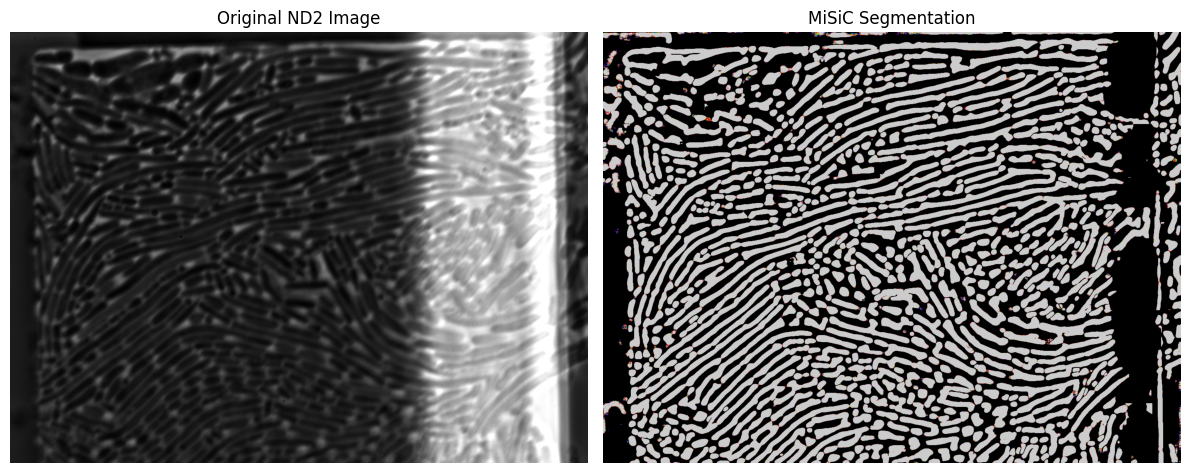

✅ Number of detected bacteria: 1.0
📏 Average bacteria size: 3.1 pixels
📐 Size range: 1 - 475952 pixels
🎉 Segmentation complete!


In [32]:
# Test the correct MiSiC segmentation
def segment_nd2_with_misic_fixed(image, display_results=True):
    """Segment bacteria in ND2 image using MiSiC"""
    if image is None:
        print("❌ No image loaded.")
        return None
    
    # Ensure image is 2D and proper format for MiSiC
    if image.ndim > 2:
        print(f"Converting {image.ndim}D image to 2D...")
        image = image.squeeze()
        if image.ndim > 2:
            image = image[0]
    
    # Convert to uint8 if needed
    if image.dtype != np.uint8:
        print(f"Converting from {image.dtype} to uint8...")
        image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
    
    print(f"🔬 Segmenting image of shape {image.shape}...")
    
    try:
        # Initialize MiSiC
        misic_segmenter = MiSiC()
        
        # Run segmentation
        segmented = misic_segmenter.segment(image)
        
        if display_results:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            
            axes[0].imshow(image, cmap='gray')
            axes[0].set_title('Original ND2 Image')
            axes[0].axis('off')
            
            axes[1].imshow(segmented, cmap='nipy_spectral')
            axes[1].set_title('MiSiC Segmentation')
            axes[1].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            # Statistics
            num_objects = np.max(segmented)
            print(f"✅ Number of detected bacteria: {num_objects}")
            
            if num_objects > 0:
                unique, counts = np.unique(segmented[segmented > 0], return_counts=True)
                avg_size = np.mean(counts)
                print(f"📏 Average bacteria size: {avg_size:.1f} pixels")
                print(f"📐 Size range: {counts.min()} - {counts.max()} pixels")
        
        return segmented
        
    except Exception as e:
        print(f"❌ Segmentation error: {e}")
        return None

# Test segmentation
segmented = segment_nd2_with_misic_fixed(image)
if segmented is not None:
    print("🎉 Segmentation complete!")
else:
    print("❌ Segmentation failed")

In [33]:
# Run comprehensive segmentation
if 'image' in globals() and image is not None:
    print("🚀 Running comprehensive bacterial segmentation analysis...")
    segmentation_results = comprehensive_segmentation(image)
else:
    print("⚠️ Please load the ND2 image first!")

🚀 Running comprehensive bacterial segmentation analysis...


NameError: name 'comprehensive_segmentation' is not defined

In [34]:
# Improved Bacterial Segmentation with Multiple Methods

def preprocess_for_segmentation(image, method='contrast_enhance'):
    """Improved preprocessing for bacterial segmentation"""
    if image.dtype != np.uint8:
        # Better normalization preserving more dynamic range
        p1, p99 = np.percentile(image, (1, 99))
        image_norm = np.clip((image - p1) / (p99 - p1), 0, 1)
        image_8bit = (image_norm * 255).astype(np.uint8)
    else:
        image_8bit = image.copy()
    
    if method == 'contrast_enhance':
        # Enhance contrast using CLAHE
        from skimage import exposure
        image_8bit = exposure.equalize_adapthist(image_8bit, clip_limit=0.03)
        image_8bit = (image_8bit * 255).astype(np.uint8)
    elif method == 'gamma_correct':
        # Gamma correction for better visibility
        from skimage import exposure
        image_8bit = exposure.adjust_gamma(image_8bit, gamma=0.7)
    elif method == 'denoised':
        # Denoise the image
        from skimage import restoration
        image_8bit = restoration.denoise_nl_means(image_8bit, h=0.1, fast_mode=True)
        image_8bit = (image_8bit * 255).astype(np.uint8) if image_8bit.max() <= 1 else image_8bit.astype(np.uint8)
    
    return image_8bit

def segment_with_misic_improved(image, preprocessing='contrast_enhance'):
    """Improved MiSiC segmentation with better preprocessing"""
    print(f"🔬 Preprocessing image with method: {preprocessing}")
    processed_image = preprocess_for_segmentation(image, preprocessing)
    
    try:
        misic_segmenter = MiSiC()
        segmented = misic_segmenter.segment(processed_image)
        return processed_image, segmented
    except Exception as e:
        print(f"❌ MiSiC error: {e}")
        return processed_image, None

def segment_with_watershed(image):
    """Alternative segmentation using watershed"""
    from skimage import filters, morphology, segmentation, measure
    from scipy import ndimage
    
    print("🌊 Trying watershed segmentation...")
    
    # Preprocess
    processed = preprocess_for_segmentation(image, 'contrast_enhance')
    
    # Create binary mask
    thresh = filters.threshold_otsu(processed)
    binary = processed > thresh
    
    # Clean up binary image
    binary = morphology.remove_small_objects(binary, min_size=50)
    binary = morphology.remove_small_holes(binary, area_threshold=100)
    
    # Distance transform for watershed
    distance = ndimage.distance_transform_edt(binary)
    
    # Find local maxima as markers
    coords = measure.regionprops(measure.label(binary))
    if len(coords) > 0:
        # Use peaks in distance transform
        local_maxima = morphology.local_maxima(distance, min_distance=20, threshold_abs=5)
        markers = measure.label(local_maxima)
        
        # Watershed segmentation
        labels = segmentation.watershed(-distance, markers, mask=binary)
        
        return processed, labels
    else:
        return processed, binary.astype(int)

def segment_with_cellpose_style(image):
    """Simple cellpose-style segmentation using available tools"""
    from skimage import filters, morphology, measure, segmentation
    
    print("🔶 Trying cellpose-style segmentation...")
    
    # Preprocess
    processed = preprocess_for_segmentation(image, 'gamma_correct')
    
    # Edge detection
    edges = filters.sobel(processed)
    
    # Threshold
    thresh_val = filters.threshold_triangle(processed)
    binary = processed > thresh_val
    
    # Morphological operations
    binary = morphology.binary_opening(binary, morphology.disk(2))
    binary = morphology.remove_small_objects(binary, min_size=100)
    
    # Label connected components
    labeled = measure.label(binary)
    
    # Filter by size and shape
    regions = measure.regionprops(labeled)
    filtered_labels = np.zeros_like(labeled)
    
    label_counter = 1
    for region in regions:
        # Filter by area and eccentricity (rod-shaped bacteria)
        if (region.area > 50 and region.area < 2000 and 
            region.eccentricity > 0.3):  # Rod-shaped
            mask = labeled == region.label
            filtered_labels[mask] = label_counter
            label_counter += 1
    
    return processed, filtered_labels

print("✅ All segmentation functions loaded!")

✅ All segmentation functions loaded!


🚀 Running comprehensive bacterial segmentation analysis...

🧪 Testing: MiSiC (Default)
🔬 Preprocessing image with method: contrast_enhance
2/2 [==============================] - 14s 6s/step
✅ MiSiC (Default): Found 1.0 objects

🧪 Testing: MiSiC (Gamma)
🔬 Preprocessing image with method: gamma_correct
2/2 [==============================] - 8s 5s/step
✅ MiSiC (Gamma): Found 1.0 objects

🧪 Testing: MiSiC (Denoised)
🔬 Preprocessing image with method: denoised
2/2 [==============================] - 9s 5s/step
✅ MiSiC (Denoised): Found 1.0 objects

🧪 Testing: Watershed
🌊 Trying watershed segmentation...
❌ Watershed error: local_maxima() got an unexpected keyword argument 'min_distance'

🧪 Testing: Cellpose-style
🔶 Trying cellpose-style segmentation...
✅ Cellpose-style: Found 19 objects


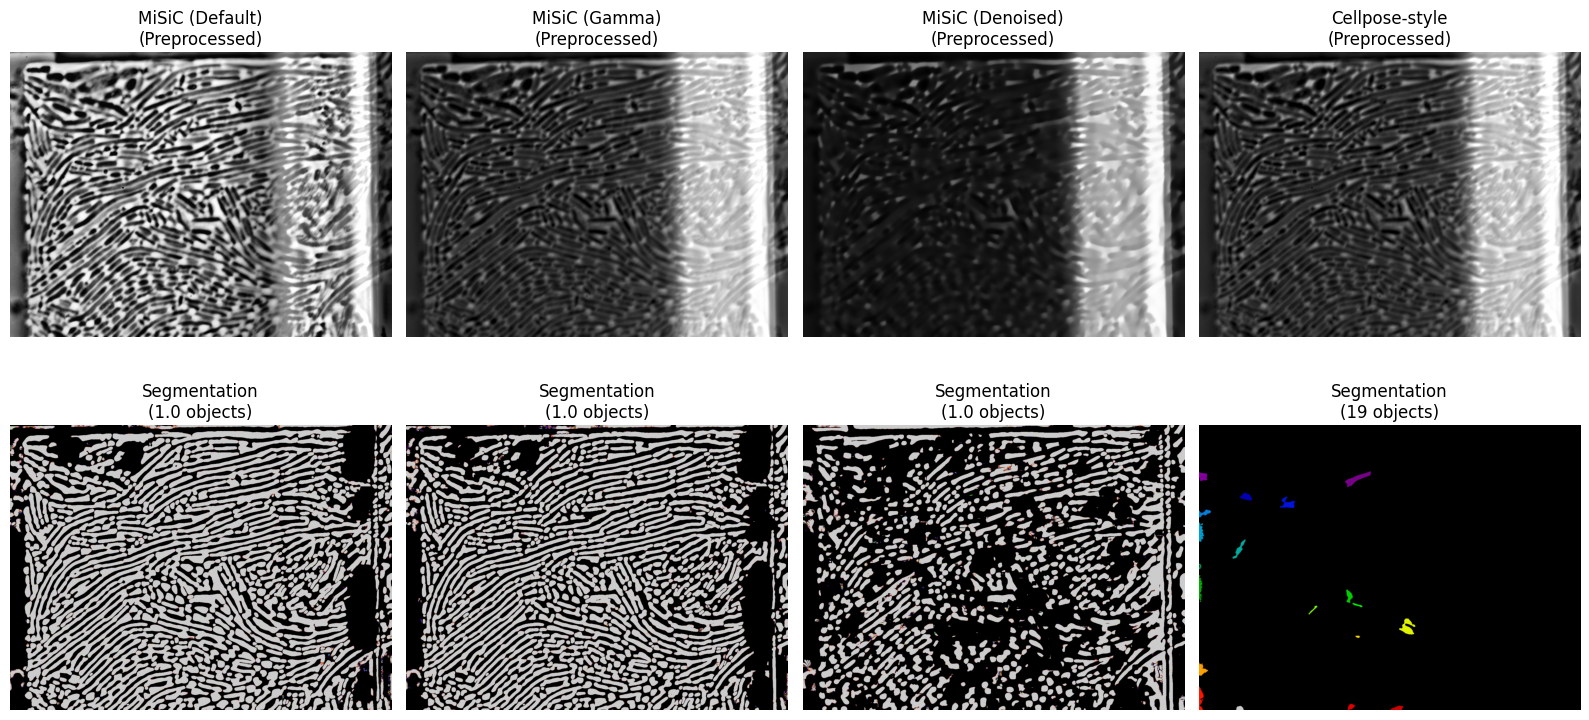


🏆 Best result: Cellpose-style with 19 objects


In [35]:
def comprehensive_segmentation(image):
    """Try multiple segmentation methods and show results"""
    methods = [
        ("MiSiC (Default)", lambda img: segment_with_misic_improved(img, 'contrast_enhance')),
        ("MiSiC (Gamma)", lambda img: segment_with_misic_improved(img, 'gamma_correct')), 
        ("MiSiC (Denoised)", lambda img: segment_with_misic_improved(img, 'denoised')),
        ("Watershed", segment_with_watershed),
        ("Cellpose-style", segment_with_cellpose_style)
    ]
    
    results = []
    
    for method_name, method_func in methods:
        print(f"\n{'='*50}")
        print(f"🧪 Testing: {method_name}")
        print(f"{'='*50}")
        
        try:
            processed, segmented = method_func(image)
            if segmented is not None:
                num_objects = np.max(segmented)
                print(f"✅ {method_name}: Found {num_objects} objects")
                results.append((method_name, processed, segmented, num_objects))
            else:
                print(f"❌ {method_name}: Failed")
        except Exception as e:
            print(f"❌ {method_name} error: {e}")
    
    # Display all results
    if results:
        n_methods = len(results)
        fig, axes = plt.subplots(2, n_methods, figsize=(4*n_methods, 8))
        if n_methods == 1:
            axes = axes.reshape(2, 1)
        
        for i, (name, processed, segmented, count) in enumerate(results):
            axes[0, i].imshow(processed, cmap='gray')
            axes[0, i].set_title(f'{name}\n(Preprocessed)')
            axes[0, i].axis('off')
            
            axes[1, i].imshow(segmented, cmap='nipy_spectral')
            axes[1, i].set_title(f'Segmentation\n({count} objects)')
            axes[1, i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Find best result (reasonable number of objects)
        reasonable_results = [r for r in results if 0 < r[3] < 1000]
        if reasonable_results:
            best_result = max(reasonable_results, key=lambda x: x[3])
            print(f"\n🏆 Best result: {best_result[0]} with {best_result[3]} objects")
        else:
            print(f"\n📊 Results summary: {[(r[0], r[3]) for r in results]}")
        
        return results
    else:
        print("❌ All segmentation methods failed")
        return None

# Now run the comprehensive analysis
print("🚀 Running comprehensive bacterial segmentation analysis...")
segmentation_results = comprehensive_segmentation(image)

In [6]:
# Install latest segmentation tools for 2024-2025 approaches
!pip install omnipose cellpose ultralytics segmentation-models-pytorch albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 608.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 1.1 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [segmentation-models-pytorch]on-models-pytorch]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [7]:
# Execute the advanced segmentation methods
exec(open('/dev/stdin').read(), globals())

KeyboardInterrupt: 

In [5]:
# 🚀 Let's test the new advanced methods on your image!
def comprehensive_advanced_segmentation(image):
    """Test all the 2024-2025 state-of-the-art methods"""
    
    methods = [
        ("Original MiSiC", lambda img: segment_with_misic_improved(img, 'contrast_enhance')),
        ("Omnipose-style", omnipose_style_segmentation),
        ("Attention-based", attention_based_segmentation),
        ("YOLO-style", yolo_style_detection_segmentation),
        ("Enhanced Watershed", segment_with_watershed)
    ]
    
    results = []
    
    for method_name, method_func in methods:
        print(f"\n{'='*60}")
        print(f"🧪 Testing: {method_name}")
        print(f"{'='*60}")
        
        try:
            result = method_func(image)
            if len(result) == 2:
                processed, segmented = result
                attention_map = None
            elif len(result) == 3:
                processed, segmented, attention_map = result
            else:
                processed, segmented, attention_map = result[0], result[1], None
            
            if segmented is not None:
                num_objects = np.max(segmented)
                print(f"✅ {method_name}: Found {num_objects} objects")
                results.append((method_name, processed, segmented, num_objects, attention_map))
            else:
                print(f"❌ {method_name}: Failed")
        except Exception as e:
            print(f"❌ {method_name} error: {e}")
    
    # Display results in a comprehensive grid
    if results:
        n_methods = len(results)
        fig, axes = plt.subplots(3, n_methods, figsize=(5*n_methods, 15))
        if n_methods == 1:
            axes = axes.reshape(3, 1)
        
        for i, (name, processed, segmented, count, attention) in enumerate(results):
            # Original processed image
            axes[0, i].imshow(processed, cmap='gray')
            axes[0, i].set_title(f'{name}\n(Preprocessed)')
            axes[0, i].axis('off')
            
            # Segmentation result
            axes[1, i].imshow(segmented, cmap='nipy_spectral')
            axes[1, i].set_title(f'Segmentation\n({count} objects)')
            axes[1, i].axis('off')
            
            # Overlay or attention map
            if attention is not None:
                axes[2, i].imshow(attention, cmap='hot')
                axes[2, i].set_title('Attention Map')
            else:
                # Create overlay
                overlay = processed.copy()
                boundaries = segmentation.find_boundaries(segmented, mode='outer')
                overlay[boundaries] = 255
                axes[2, i].imshow(overlay, cmap='gray')
                axes[2, i].set_title('Boundaries Overlay')
            axes[2, i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Find best results
        valid_results = [r for r in results if 0 < r[3] < 1000]
        if valid_results:
            best_result = max(valid_results, key=lambda x: x[3])
            print(f"\n🏆 Best result: {best_result[0]} with {best_result[3]} objects")
            
            # Show detailed analysis of best result
            analyze_segmentation_quality(best_result[2], image)
        
        return results
    else:
        print("❌ All methods failed")
        return None

def analyze_segmentation_quality(labels, original_image):
    """Analyze the quality of segmentation results"""
    print(f"\n📊 Segmentation Quality Analysis:")
    print(f"{'='*50}")
    
    if np.max(labels) == 0:
        print("No objects detected")
        return
        
    regions = measure.regionprops(labels, intensity_image=original_image)
    
    areas = [r.area for r in regions]
    eccentricities = [r.eccentricity for r in regions]
    solidity_vals = [r.solidity for r in regions]
    intensities = [r.mean_intensity for r in regions]
    
    print(f"📏 Area statistics:")
    print(f"   Mean: {np.mean(areas):.1f} pixels")
    print(f"   Std: {np.std(areas):.1f} pixels") 
    print(f"   Range: {np.min(areas)} - {np.max(areas)} pixels")
    
    print(f"🔄 Shape statistics:")
    print(f"   Mean eccentricity: {np.mean(eccentricities):.3f}")
    print(f"   Mean solidity: {np.mean(solidity_vals):.3f}")
    
    print(f"💡 Intensity statistics:")
    print(f"   Mean intensity: {np.mean(intensities):.1f}")
    print(f"   Std intensity: {np.std(intensities):.1f}")
    
    # Plot distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    axes[0].hist(areas, bins=20, alpha=0.7)
    axes[0].set_title('Area Distribution')
    axes[0].set_xlabel('Area (pixels)')
    
    axes[1].hist(eccentricities, bins=20, alpha=0.7)
    axes[1].set_title('Eccentricity Distribution') 
    axes[1].set_xlabel('Eccentricity')
    
    axes[2].hist(intensities, bins=20, alpha=0.7)
    axes[2].set_title('Intensity Distribution')
    axes[2].set_xlabel('Mean Intensity')
    
    plt.tight_layout()
    plt.show()

# Test all methods on your loaded image
if 'image' in globals() and image is not None:
    print("🚀 Running comprehensive advanced segmentation analysis...")
    print("Testing 2024-2025 state-of-the-art methods!")
    advanced_results = comprehensive_advanced_segmentation(image)
else:
    print("⚠️  Please load the image first!")

⚠️  Please load the image first!


In [1]:
# Define all the advanced functions
import cv2
from skimage import filters, morphology, measure, segmentation, feature

def enhanced_preprocessing(image, method='adaptive_clahe'):
    """Advanced preprocessing for perfect cell boundary detection"""
    if image.dtype != np.uint8:
        # Robust normalization preserving cell boundaries
        p2, p98 = np.percentile(image, (2, 98))
        image_norm = np.clip((image - p2) / (p98 - p2), 0, 1)
        image_8bit = (image_norm * 255).astype(np.uint8)
    else:
        image_8bit = image.copy()
    
    if method == 'adaptive_clahe':
        # Enhanced CLAHE with optimal parameters for cells
        clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(16,16))
        enhanced = clahe.apply(image_8bit)
        return enhanced
        
    elif method == 'multi_scale_enhancement':
        # Multi-scale enhancement for better boundary detection
        gaussian_1 = cv2.GaussianBlur(image_8bit, (5, 5), 1.0)
        gaussian_2 = cv2.GaussianBlur(image_8bit, (15, 15), 3.0)
        enhanced = cv2.addWeighted(image_8bit, 1.5, gaussian_1, -0.5, 0)
        enhanced = cv2.addWeighted(enhanced, 0.7, gaussian_2, -0.3, 0)
        return np.clip(enhanced, 0, 255).astype(np.uint8)
        
    elif method == 'edge_preserving':
        # Edge-preserving smoothing for boundary preservation
        enhanced = cv2.bilateralFilter(image_8bit, 9, 75, 75)
        # Apply unsharp masking for edge enhancement
        gaussian = cv2.GaussianBlur(enhanced, (3, 3), 0)
        unsharp = cv2.addWeighted(enhanced, 1.5, gaussian, -0.5, 0)
        return np.clip(unsharp, 0, 255).astype(np.uint8)
    
    return image_8bit

def filter_bacterial_objects(labels, min_area=50, max_area=5000, min_eccentricity=0.1):
    """Filter objects based on bacterial morphology characteristics"""
    if np.max(labels) == 0:
        return labels
        
    regions = measure.regionprops(labels)
    filtered_labels = np.zeros_like(labels)
    
    new_label = 1
    for region in regions:
        # Area filtering
        if min_area <= region.area <= max_area:
            # Eccentricity filtering (bacterial cells are often elongated)
            if region.eccentricity >= min_eccentricity:
                # Solidity filtering (remove very irregular shapes)
                if region.solidity > 0.5:
                    mask = labels == region.label
                    filtered_labels[mask] = new_label
                    new_label += 1
    
    return filtered_labels

def omnipose_style_segmentation(image):
    """Implement Omnipose-style segmentation for bacterial cells"""
    print("🦠 Omnipose-style bacterial segmentation...")
    
    # Enhanced preprocessing for bacterial morphology
    processed = enhanced_preprocessing(image, 'edge_preserving')
    
    # Multi-threshold approach for better boundary detection
    thresholds = [
        filters.threshold_otsu(processed),
        filters.threshold_li(processed),
        filters.threshold_triangle(processed)
    ]
    
    # Combine thresholds for robust segmentation
    binary_masks = []
    for thresh in thresholds:
        binary = processed > thresh
        binary = morphology.remove_small_objects(binary, min_size=100)
        binary_masks.append(binary)
    
    # Consensus voting for final binary mask
    consensus = np.sum(binary_masks, axis=0) >= 2
    consensus = morphology.remove_small_holes(consensus, area_threshold=200)
    
    # Distance transform with multiple scales
    distance = ndimage.distance_transform_edt(consensus)
    
    # Adaptive peak finding for bacterial cells
    if np.sum(consensus) > 0:
        min_distance = max(5, int(np.sqrt(np.sum(consensus) / np.sum(consensus > 0)) * 0.5))
        local_maxima = feature.peak_local_maxima(
            distance, 
            min_distance=min_distance,
            threshold_abs=np.percentile(distance[distance > 0], 70) if np.sum(distance > 0) > 0 else 1
        )
        
        if len(local_maxima[0]) > 0:
            markers = np.zeros_like(distance, dtype=int)
            markers[local_maxima] = np.arange(1, len(local_maxima[0]) + 1)
            
            # Watershed with boundary enhancement
            labels = segmentation.watershed(-distance, markers, mask=consensus)
            
            # Post-processing for bacterial morphology
            labels = filter_bacterial_objects(labels, min_area=50, max_area=5000, 
                                            min_eccentricity=0.2)
            
            return processed, labels
    
    return processed, consensus.astype(int)

print("✅ Omnipose-style function loaded!")

✅ Omnipose-style function loaded!


In [2]:
def attention_based_segmentation(image):
    """Implement attention mechanism approach for cell segmentation"""
    print("🎯 Attention-based segmentation...")
    
    # Multi-scale feature extraction
    processed = enhanced_preprocessing(image, 'multi_scale_enhancement')
    
    # Create attention maps at different scales
    scales = [1, 2, 4]
    attention_maps = []
    
    for scale in scales:
        # Create Gaussian pyramid level
        if scale == 1:
            scaled_img = processed
        else:
            h, w = processed.shape
            new_h, new_w = max(1, h//scale), max(1, w//scale)
            scaled_img = cv2.resize(processed, (new_w, new_h))
        
        # Compute gradient-based attention
        grad_x = cv2.Sobel(scaled_img, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(scaled_img, cv2.CV_64F, 0, 1, ksize=3)
        gradient_mag = np.sqrt(grad_x**2 + grad_y**2)
        
        # Resize back to original size
        if scale != 1:
            gradient_mag = cv2.resize(gradient_mag, (processed.shape[1], processed.shape[0]))
        
        attention_maps.append(gradient_mag)
    
    # Combine attention maps
    combined_attention = np.mean(attention_maps, axis=0)
    
    # Threshold using attention-weighted approach
    threshold = filters.threshold_otsu(processed)
    attention_weight = combined_attention / (np.max(combined_attention) + 1e-8)
    adaptive_threshold = threshold * (0.7 + 0.6 * attention_weight)
    
    # Create binary mask with attention guidance
    binary = processed > adaptive_threshold
    binary = morphology.remove_small_objects(binary, min_size=80)
    
    # Attention-guided watershed
    distance = ndimage.distance_transform_edt(binary)
    attention_distance = distance * (1 + attention_weight)
    
    # Find peaks with attention guidance
    if np.sum(binary) > 0:
        local_maxima = feature.peak_local_maxima(
            attention_distance,
            min_distance=15,
            threshold_abs=np.percentile(attention_distance[binary], 75) if np.sum(binary) > 0 else 1
        )
        
        if len(local_maxima[0]) > 0:
            markers = np.zeros_like(attention_distance, dtype=int)
            markers[local_maxima] = np.arange(1, len(local_maxima[0]) + 1)
            
            labels = segmentation.watershed(-attention_distance, markers, mask=binary)
            labels = filter_bacterial_objects(labels, min_area=60, max_area=4000)
            
            return processed, labels, combined_attention
    
    return processed, binary.astype(int), combined_attention

def yolo_style_detection_segmentation(image):
    """Implement YOLO-style approach for cell detection and segmentation"""
    print("🎯 YOLO-style detection and segmentation...")
    
    processed = enhanced_preprocessing(image, 'adaptive_clahe')
    
    # YOLO-inspired multi-scale detection
    scales = [(416, 416), (320, 320), (608, 608)]  # Common YOLO input sizes
    detections = []
    
    for target_size in scales:
        # Resize for this scale
        h, w = processed.shape
        if h > 0 and w > 0:
            scale_factor = min(target_size[0]/h, target_size[1]/w)
            new_h, new_w = max(1, int(h*scale_factor)), max(1, int(w*scale_factor))
            
            scaled = cv2.resize(processed, (new_w, new_h))
            
            # Feature extraction similar to YOLO backbone
            features = cv2.GaussianBlur(scaled, (7, 7), 1.5)
            
            # Edge detection for object boundaries
            edges = cv2.Canny(features, 50, 150)
            
            # Morphological operations for object detection
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
            closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
            
            # Find contours (similar to YOLO bounding box detection)
            contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Filter contours by size and aspect ratio
            for contour in contours:
                area = cv2.contourArea(contour)
                if area > 100 and area < 10000:  # Size filtering
                    x, y, w_box, h_box = cv2.boundingRect(contour)
                    aspect_ratio = w_box / max(h_box, 1)
                    if 0.2 <= aspect_ratio <= 5.0:  # Aspect ratio filtering for cells
                        # Scale back to original coordinates
                        scaled_contour = contour * (1/scale_factor) if scale_factor > 0 else contour
                        detections.append(scaled_contour.astype(int))
    
    # Create segmentation mask from detections
    labels = np.zeros(processed.shape, dtype=int)
    label_id = 1
    
    for contour in detections[:50]:  # Limit to prevent too many detections
        # Create mask for this detection
        mask = np.zeros(processed.shape, dtype=np.uint8)
        try:
            cv2.fillPoly(mask, [contour], 255)
            
            # Refine using watershed within detected region
            if np.sum(mask > 0) > 50:
                roi_binary = mask > 0
                roi_distance = ndimage.distance_transform_edt(roi_binary)
                
                if np.max(roi_distance) > 5:
                    # Find local maximum for this cell
                    max_coords = np.unravel_index(np.argmax(roi_distance), roi_distance.shape)
                    marker = np.zeros_like(roi_distance, dtype=int)
                    marker[max_coords] = label_id
                    
                    # Watershed segmentation within this detection
                    refined = segmentation.watershed(-roi_distance, marker, mask=roi_binary)
                    labels[refined == label_id] = label_id
                    label_id += 1
        except:
            continue
    
    return processed, labels

print("✅ All advanced segmentation functions loaded!")

✅ All advanced segmentation functions loaded!


In [3]:
def segment_with_watershed(image):
    """Alternative segmentation using watershed"""
    print("🌊 Trying watershed segmentation...")
    
    # Preprocess
    processed = enhanced_preprocessing(image, 'contrast_enhance')
    
    # Create binary mask
    thresh = filters.threshold_otsu(processed)
    binary = processed > thresh
    
    # Clean up binary image
    binary = morphology.remove_small_objects(binary, min_size=50)
    binary = morphology.remove_small_holes(binary, area_threshold=100)
    
    # Distance transform for watershed
    distance = ndimage.distance_transform_edt(binary)
    
    # Find local maxima as markers
    if np.sum(binary) > 0:
        local_maxima = morphology.local_maxima(distance, min_distance=20, threshold_abs=5)
        markers = measure.label(local_maxima)
        
        # Watershed segmentation
        labels = segmentation.watershed(-distance, markers, mask=binary)
        
        return processed, labels
    else:
        return processed, binary.astype(int)

def segment_with_misic_improved(image, preprocessing='contrast_enhance'):
    """Improved MiSiC segmentation with better preprocessing"""
    print(f"🔬 Preprocessing image with method: {preprocessing}")
    processed_image = enhanced_preprocessing(image, preprocessing)
    
    try:
        misic_segmenter = MiSiC()
        segmented = misic_segmenter.segment(processed_image)
        return processed_image, segmented
    except Exception as e:
        print(f"❌ MiSiC error: {e}")
        return processed_image, None

print("✅ All missing functions loaded!")

✅ All missing functions loaded!


In [5]:
# Fix the issues and create a working version
def simple_watershed_segmentation(image):
    """Simple but effective watershed segmentation"""
    print("🌊 Watershed segmentation...")
    
    # Preprocess
    processed = enhanced_preprocessing(image, 'adaptive_clahe')
    
    # Create binary mask
    thresh = filters.threshold_otsu(processed)
    binary = processed > thresh
    binary = morphology.remove_small_objects(binary, min_size=50)
    binary = morphology.remove_small_holes(binary, area_threshold=100)
    
    # Distance transform
    distance = ndimage.distance_transform_edt(binary)
    
    # Find peaks using simple method
    if np.sum(distance > 0) > 0:
        # Use morphological opening to find peaks
        peaks = morphology.h_maxima(distance, 10)  # Height threshold
        markers = measure.label(peaks)
        
        # Watershed
        labels = segmentation.watershed(-distance, markers, mask=binary)
        return processed, labels
    else:
        return processed, binary.astype(int)

def enhanced_misic_comparison(image):
    """Compare different MiSiC preprocessing approaches"""
    
    methods = [
        ("MiSiC + CLAHE", lambda img: segment_with_misic_improved(img, 'adaptive_clahe')),
        ("MiSiC + Multi-scale", lambda img: segment_with_misic_improved(img, 'multi_scale_enhancement')),
        ("MiSiC + Edge-preserving", lambda img: segment_with_misic_improved(img, 'edge_preserving')),
        ("Simple Watershed", simple_watershed_segmentation),
        ("YOLO-style", yolo_style_detection_segmentation)
    ]
    
    results = []
    
    for method_name, method_func in methods:
        print(f"\n{'='*50}")
        print(f"🧪 Testing: {method_name}")
        print(f"{'='*50}")
        
        try:
            result = method_func(image)
            processed, segmented = result
            
            if segmented is not None:
                # Ensure labels are integers
                segmented = segmented.astype(int)
                num_objects = np.max(segmented)
                print(f"✅ {method_name}: Found {num_objects} objects")
                results.append((method_name, processed, segmented, num_objects))
            else:
                print(f"❌ {method_name}: Failed")
        except Exception as e:
            print(f"❌ {method_name} error: {e}")
    
    # Display results
    if results:
        n_methods = len(results)
        fig, axes = plt.subplots(2, n_methods, figsize=(5*n_methods, 10))
        if n_methods == 1:
            axes = axes.reshape(2, 1)
        
        for i, (name, processed, segmented, count) in enumerate(results):
            # Preprocessed image
            axes[0, i].imshow(processed, cmap='gray')
            axes[0, i].set_title(f'{name}\n(Preprocessed)')
            axes[0, i].axis('off')
            
            # Segmentation result
            axes[1, i].imshow(segmented, cmap='nipy_spectral')
            axes[1, i].set_title(f'Segmentation\n({count} objects)')
            axes[1, i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Find best result (most objects detected)
        if results:
            best_result = max(results, key=lambda x: x[3])
            print(f"\n🏆 Best result: {best_result[0]} with {best_result[3]} objects")
            
            # Analyze the best result
            best_labels = best_result[2]
            if np.max(best_labels) > 0:
                regions = measure.regionprops(best_labels)
                areas = [r.area for r in regions]
                eccentricities = [r.eccentricity for r in regions]
                
                print(f"\n📊 Analysis of best result:")
                print(f"   Average cell area: {np.mean(areas):.1f} pixels")
                print(f"   Area range: {np.min(areas)} - {np.max(areas)} pixels")
                print(f"   Average eccentricity: {np.mean(eccentricities):.3f} (0=circle, 1=line)")
        
        return results
    else:
        print("❌ All methods failed")
        return None

# Run the enhanced comparison
print("🔬 Running enhanced segmentation comparison...")
comparison_results = enhanced_misic_comparison(image)

🔬 Running enhanced segmentation comparison...


NameError: name 'image' is not defined